In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(2023)
np.set_printoptions(precision=4, suppress=True)

In [6]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(8,4))

In [3]:
from datetime import datetime

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s

In [ ]:
s.plot()

In [ ]:
s.plot(style='o:r') # 점선 그래프, red

In [ ]:
np.random.seed(2023)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) # 0 ~ 1까지 난수
data

In [ ]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
fig, axes = plt.subplots(2, 1)
data.plot(ax=axes[0], kind='bar', color='k', alpha=0.7)
data.plot(ax=axes[1], kind='barh', color='k', alpha=0.7)

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),   # 행방향 누적합계
                                            columns = ["A", "B", "C", "D"],
                                            index=np.arange(0, 100, 10))
df

In [ ]:
df.plot()

In [ ]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns = ["A", "B", "C", "D"],
                   index=np.arange(0, 100, 10))
df

In [ ]:
df.plot(subplots=True)

In [ ]:
np.random.seed(2023)
df = pd.DataFrame(np.random.uniform(size=(6,4)), # 실수
                  index = ['one', 'two', 'three','four','five','six'],
                  columns = pd.Index(["A", "B", "C", "D"], name='Genus')) # name : 인덱스명
df

In [ ]:
df.plot.barh()

In [ ]:
plt.figure() # 그래프창 생성
df.plot.bar(stacked=True, alpha=0.5) # stack 누적

In [23]:
plt.style.use('grayscale') # 그래프 스타일 변환

In [ ]:
plt.figure()
df.plot.barh(stacked=True, alpha=0.5)

In [26]:
path = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/tips.csv'

In [ ]:
tips = pd.read_csv(path) # 데이터를 가져와서 바로 객체로 변환
tips

In [ ]:
'''
total_bill : 총 수입
tip : 서빙 팀 수입
smoker : 테이블 손님 흡연 여부
day : 요일
time : 시간대
size : 테이블 손님 수
'''

In [28]:
tips['smoker'].unique() # 흡연 비흡연 여부

array(['No', 'Yes'], dtype=object)

In [29]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [30]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [31]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [35]:
party_counts = pd.crosstab(tips['day'], tips['size']) # 교차표
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = party_counts.loc[:, 2:5]
party_counts

In [37]:
party_counts = party_counts.reindex(index=['Thur','Fri','Sat','Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [36]:
# 각 행의 합이 1이 되도록 정규화
row_sum = party_counts.sum(axis=1) # 열방향 합계
party_pcts = party_counts.div(row_sum, axis=0) # div는 항목별 나눗셈
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


In [ ]:
party_pcts.plot.bar()

In [ ]:
party_pcts.plot.bar(stacked=True)

In [40]:
plt.style.use('seaborn-v0_8') # 시본스타일로 변경

In [ ]:
party_pcts.plot.bar(stacked=True)

In [42]:
url = 'https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/examples/'

In [ ]:
data = pd.read_csv(url + 'spx.csv')
data

In [55]:
data = pd.read_csv(url + 'spx.csv', index_col=0, parse_dates=True) # 0번 열을 인덱스로 지정하겠다. parse_dates : 연원일까지 구분하겠다.
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


In [56]:
spx = data['SPX'] # 시리즈 형태로
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

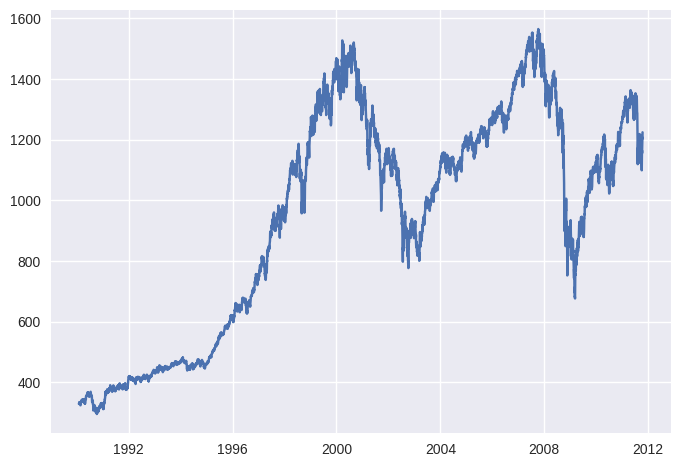

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(spx)

In [59]:
crisis_data = [ #
    (datetime(2007, 10, 11), 'Peak of bull market'), # 주가 강세장 위치
    (datetime(2008, 3, 12), 'Bear Stearns Fails'), # 베어스텐스 투자은행 붕괴
    (datetime(2008, 9, 15), 'Lehman Bankruptcy') # 레만 투자은행 파산
]

- `xy` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

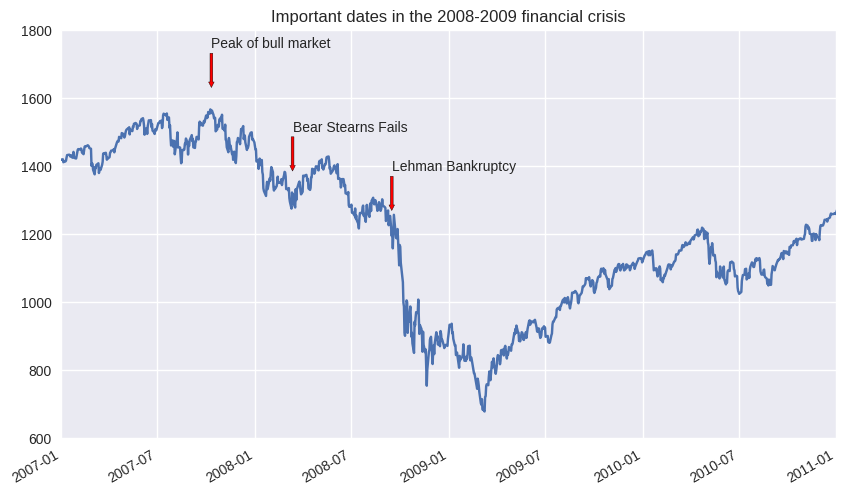

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')